In [1]:
'''Дана функция f(x) = (sin(x)/2 + cos(x)/2)^2 * sin(x))

Определить корни

Найти интервалы, на которых функция возрастает

Найти интервалы, на которых функция убывает

Построить график

Вычислить вершину

Определить промежутки, на котором f > 0

Определить промежутки, на котором f < 0'''

from sympy.abc import x
from sympy import *
from sympy.calculus.util import maximum

y = trigsimp(((sin(x)/2) + (cos(x)/2)) ** 2 * sin(x))
y

sin(x)*sin(x + pi/4)**2/2

In [2]:
'''1. Определить корни.'''

x_when_y_null = solveset(y, x)
x_when_y_null

Union(ImageSet(Lambda(_n, 2*_n*pi + 3*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + 7*pi/4), Integers), ImageSet(Lambda(_n, 2*_n*pi + pi), Integers), ImageSet(Lambda(_n, 2*_n*pi), Integers))

In [4]:
# Обозначения при выводе корней (для ориентира по записи корней): ∪ - объединение множеств: множество,
# содержащее в себе все элементы исходных множеств; ℤ — множество целых чисел. Оно состоит из натуральных чисел,
# им противоположных и нуля.

#  Из решения шага (поиск корней) выше следует, что период функции равен 2𝜋, для дальнейших шагов будем использовать 
# минимальный положительный период [0; 2𝜋], т.к. далее все, что мы найдем, будет повторяться с шагом в 2𝜋.
# Корни на минимальном положительном периоде от 0 до 2𝜋: 0, 𝜋, 3𝜋/4, 7𝜋/4, 2𝜋.

'''2. Найти интервалы, на которых функция возрастает.'''

x_when_diff_y_null_in_period = sorted(solveset(diff(y, x), x, domain=Interval(0, 2*pi)))
# x_when_y_null_in_period - список из координат x, в которых y' = 0 (y' - производная) 
# на отрезке минимального положительного периода, в этих точках будут точки экстремума (перегиба в графике)
div_arr = []
# div_arr будет списком из разниц между координатами x, в которых y' = 0
for i in range(0, len(x_when_diff_y_null_in_period)):
    div = simplify(x_when_diff_y_null_in_period[i] - x_when_diff_y_null_in_period[i-1])
    div_arr.append(div)
min_div = min(div_arr)
min_div
# min_div - значение минимума из списка разниц списка между элементами div_arr (для последующего использования);
# min_div используется для того, чтобы не выйти за пределы интервала между элементами x_when_diff_y_null_in_period
for i in range(1, 100):
    if 1 / (10 ** i) < min_div:
        div = 1 / (10 ** i)
        break
# div - такая разница, которая меньше минимальной разницы между элементами списка div_arr
for i in range(0, len(x_when_diff_y_null_in_period)):
    if y.subs(x, x_when_diff_y_null_in_period[i]) > y.subs(x, x_when_diff_y_null_in_period[i] + div):
        print(f'Функция возрастает на отрезке: [{simplify(x_when_diff_y_null_in_period[i-1])}; {simplify(x_when_diff_y_null_in_period[i])}]\n')
    else:
        continue

Функция возрастает на отрезке: [-atan(9/8 - sqrt(17)/8)/2 + 2*pi; atan(1/tan(atan(sqrt(17)/8 + 9/8)/2))]

Функция возрастает на отрезке: [3*pi/4; pi - atan(9/8 - sqrt(17)/8)/2]

Функция возрастает на отрезке: [-atan(sqrt(17)/8 + 9/8)/2 + 3*pi/2; 7*pi/4]



In [5]:
'''3. Найти интервалы, на которых функция убывает.'''

for i in range(0, len(x_when_diff_y_null_in_period)):
    if y.subs(x, x_when_diff_y_null_in_period[i]) < y.subs(x, x_when_diff_y_null_in_period[i] + div):
        print(f'Функция убывает на отрезке: [{simplify(x_when_diff_y_null_in_period[i-1])}; {simplify(x_when_diff_y_null_in_period[i])}]\n')
    else:
        continue

Функция убывает на отрезке: [atan(1/tan(atan(sqrt(17)/8 + 9/8)/2)); 3*pi/4]

Функция убывает на отрезке: [pi - atan(9/8 - sqrt(17)/8)/2; -atan(sqrt(17)/8 + 9/8)/2 + 3*pi/2]

Функция убывает на отрезке: [7*pi/4; -atan(9/8 - sqrt(17)/8)/2 + 2*pi]



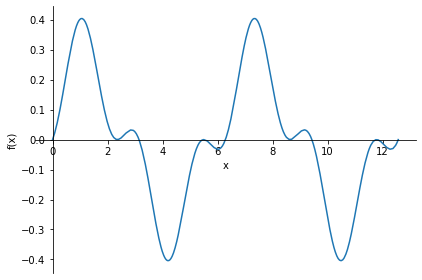

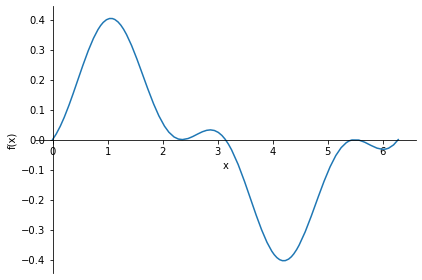

In [6]:
'''4. Построить график.'''

# Построим график на минимальном положительном периоде, а также на двойном минимальном положительном периоде 
# (двойной минимальный период взят для того, чтобы наглядно убедиться в повторении графика на минимальном 
# положительном периоде 2𝜋).

graph_double = plot(y, (x, 0, 4*pi)) # график на двойном минимальном положительном периоде 
graph_min = plot(y, (x, 0, 2*pi)) # график на минимальном положительном периоде 

In [7]:
'''5. Вычислить вершину.'''

max_min = solveset(diff(y, x), x, domain=Interval(0, 2*pi))
max_min = list(max_min)
y_arr = []
x_arr = []
for i in range(0, len(max_min)):
    x_arr.append(simplify(max_min[i]))
    y_arr.append(y.subs(x, simplify(max_min[i])))
max_y_index = y_arr.index(max(y_arr))
print('Вершина (точка с максимальным значением по y) в пределах минимального положительного периода имеет координаты:\n')
print(f'x-координата: {x_arr[max_y_index]}\n')
print(f'y-координата: {y_arr[max_y_index]}\n')

Вершина (точка с максимальным значением по y) в пределах минимального положительного периода имеет координаты:

x-координата: atan(1/tan(atan(sqrt(17)/8 + 9/8)/2))

y-координата: sin(pi/4 + atan(1/tan(atan(sqrt(17)/8 + 9/8)/2)))**2/(2*sqrt(1 + tan(atan(sqrt(17)/8 + 9/8)/2)**(-2))*tan(atan(sqrt(17)/8 + 9/8)/2))



In [8]:
'''6. Определить промежутки, на котором f > 0.'''

solve_univariate_inequality(y > 0, x, relational=False, domain=Interval(0, 2*pi))

Union(Interval.open(0, 3*pi/4), Interval.open(3*pi/4, pi))

In [9]:
# Ответ: на промежутке минимального положительного периода [0; 2𝜋] функция положительная при x > 0 и x < 𝜋, исключая
# точку x = 3𝜋/4. Точка x = 3𝜋/4 исключена из решения, т.к. эта точка - один из корней уравнения f(x) = 0.

'''7. Определить промежутки, на котором f < 0.'''

solve_univariate_inequality(y < 0, x, relational=False, domain=Interval(0, 2*pi))

Union(Interval.open(pi, 7*pi/4), Interval.open(7*pi/4, 2*pi))

In [ ]:
# Ответ: на промежутке минимального положительного периода [0; 2𝜋] функция отрицательная при x > 𝜋 и x < 2𝜋, исключая
# точку x = 7𝜋/4. Точка x = 7𝜋/4 исключена из решения, т.к. эта точка - один из корней уравнения f(x) = 0.